In [ ]:
import pandas as pd

# Load the JSON file using the provided path
file_path = r"C:\Users\HP\Documents\MACHINE LEARNING CLASSIFICATION OF TWEETS-BI95CZ\data\CETM47_24_5-AS2-Data.json"
df = pd.read_json(file_path)

# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the shape of the DataFrame
print(f"\nShape of the DataFrame: {df.shape}")

# Print the column names and their data types
print("\nColumn Information:")
print(df.info()) nhm

| text                                                                                                                                                                                                                                                            | date                | label   | id                  | label_name      |
|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:--------------------|:--------|:--------------------|:----------------|
| The {@Clinton LumberKings@} beat the {@Cedar Rapids Kernels@} 4-0 in Game 1 of the Western Division finals. Evan Edwards hit a 2-run HR. WP Josh Roberson: 5 IP, 3 H, 0 R, 0 BB, 10 K #MWLplayoffs #MWLscoreboard                                               | 2019-09-08 00:00:00 | 4       | 1170516324419866624 | sports_&_gaming |
| I 

In [ ]:
# Display number of unique labels
num_unique_labels = df['label'].nunique()
print(f"Number of unique labels (numeric): {num_unique_labels}")

num_unique_label_names = df['label_name'].nunique()
print(f"Number of unique labels (names): {num_unique_label_names}")

# Display distribution of labels (numeric)
print("\nDistribution of numeric labels:")
print(df['label'].value_counts().sort_index().to_markdown(numalign="left", stralign="left"))

# Distribution of label names
print("\nDistribution of label names:")
print(df['label_name'].value_counts().to_markdown(numalign="left", stralign="left"))

Number of unique labels (numeric): 6
Number of unique labels (names): 6

Distribution of numeric labels:
| label   | count   |
|:--------|:--------|
| 0       | 144     |
| 1       | 287     |
| 2       | 2512    |
| 3       | 883     |
| 4       | 2291    |
| 5       | 326     |

Distribution of label names:
| label_name               | count   |
|:-------------------------|:--------|
| pop_culture              | 2512    |
| sports_&_gaming          | 2291    |
| daily_life               | 883     |
| science_&_technology     | 326     |
| business_&_entrepreneurs | 287     |
| arts_&_culture           | 144     |


In [ ]:
import numpy as np

# Calculate tweet lengths
df['text_length'] = df['text'].apply(len)  # Character count


# Group by label and get statistics
length_stats = df.groupby('label')['text_length'].describe()
print("\nTweet Length Statistics:")
print(length_stats.to_markdown(numalign="left", stralign="left"))

# Display example tweets
def print_example_tweets(df, label_name, num_examples=5):
    print(f"\n--- Examples for category: {label_name} ---")
    examples = df[df['label_name'] == label_name]['text'].sample(num_examples, random_state=42)  # Consistent examples
    for i, example in enumerate(examples):
        print(f"{i+1}. {example}")

# Print examples for each category
for label in df['label_name'].unique():
    print_example_tweets(df, label)


Tweet Length Statistics:
| label   | count   | mean    | std     | min   | 25%    | 50%   | 75%    | max   |
|:--------|:--------|:--------|:--------|:------|:-------|:------|:-------|:------|
| 0       | 144     | 180.188 | 68.0527 | 50    | 114.75 | 186   | 237.5  | 306   |
| 1       | 287     | 195.857 | 65.6587 | 64    | 142.5  | 203   | 253    | 353   |
| 2       | 2512    | 153.445 | 66.7246 | 39    | 98     | 138   | 207    | 325   |
| 3       | 883     | 178.166 | 69.1297 | 38    | 117    | 177   | 240    | 338   |
| 4       | 2291    | 167.784 | 66.6214 | 42    | 111.5  | 157   | 224    | 322   |
| 5       | 326     | 184.755 | 69.895  | 58    | 119.25 | 183   | 249.75 | 347   |

--- Examples for category: sports_&_gaming ---
1. Everybody feeling sorry for the loaded Nets  I know a guy played every minute of a game with a 50 piece averaged a triple double and lost and yaw slandered the man ! Hold {@Kevin Durant@} to the same standard
2. Shout out to {@Dominick Cruz@} great fi

In [152]:
import re

def clean_text(text):
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|{{URL}}', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove special characters and digits (keep only letters and spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Lowercase the text
    text = text.lower()
    return text

# Apply the cleaning function to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)

# Display the original and cleaned text for a few examples
for i in range(5):
    print(f"--- Example {i+1} ---")
    print(f"Original: {df['text'][i]}")
    print(f"Cleaned:  {df['cleaned_text'][i]}")
    print("\n")

--- Example 1 ---
Original: The {@Clinton LumberKings@} beat the {@Cedar Rapids Kernels@} 4-0 in Game 1 of the Western Division finals. Evan Edwards hit a 2-run HR. WP Josh Roberson: 5 IP, 3 H, 0 R, 0 BB, 10 K #MWLplayoffs #MWLscoreboard
Cleaned:  the  lumberkings beat the  rapids kernels  in game  of the western division finals evan edwards hit a run hr wp josh roberson  ip  h  r  bb  k  


--- Example 2 ---
Original: I would rather hear Eli Gold announce this Auburn game than these dumbasses. {@ESPN@}
Cleaned:  i would rather hear eli gold announce this auburn game than these dumbasses 


--- Example 3 ---
Original: Someone take my phone away, I’m trying to not look at {@Chicago Blackhawks@} home game tickets in October 
Cleaned:  someone take my phone away im trying to not look at  blackhawks home game tickets in october 


--- Example 4 ---
Original: A year ago, Louisville struggled to beat an FCS opponent, ISU.  Yes they won 31-7, but score wasn’t indicative of the game flow.  Tod

In [ ]:
import re

def clean_text(text):
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|{{URL}}', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove special characters and digits but keep only letters and spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Lowercase the text
    text = text.lower()
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)

# Display the original and cleaned text for a few examples
for i in range(5):
    print(f"--- Example {i+1} ---")
    print(f"Original: {df['text'][i]}")
    print(f"Cleaned:  {df['cleaned_text'][i]}")
    print("\n")

--- Example 1 ---
Original: The {@Clinton LumberKings@} beat the {@Cedar Rapids Kernels@} 4-0 in Game 1 of the Western Division finals. Evan Edwards hit a 2-run HR. WP Josh Roberson: 5 IP, 3 H, 0 R, 0 BB, 10 K #MWLplayoffs #MWLscoreboard
Cleaned:  the lumberkings beat the rapids kernels in game of the western division finals evan edwards hit a run hr wp josh roberson ip h r bb k


--- Example 2 ---
Original: I would rather hear Eli Gold announce this Auburn game than these dumbasses. {@ESPN@}
Cleaned:  i would rather hear eli gold announce this auburn game than these dumbasses


--- Example 3 ---
Original: Someone take my phone away, I’m trying to not look at {@Chicago Blackhawks@} home game tickets in October 
Cleaned:  someone take my phone away im trying to not look at blackhawks home game tickets in october


--- Example 4 ---
Original: A year ago, Louisville struggled to beat an FCS opponent, ISU.  Yes they won 31-7, but score wasn’t indicative of the game flow.  Today, they are d

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
import os

# Specify the download directory in my current working directory ()
nltk_data_dir = os.path.join(os.getcwd(), 'nltk_data')
nltk.data.path.append(nltk_data_dir)

# Download the punkt tokenizer 
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt', download_dir=nltk_data_dir)

# Download the punkt_tab resource 
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab', download_dir=nltk_data_dir)

# Tokenize the cleaned text
df['tokenized_text'] = df['cleaned_text'].apply(word_tokenize)

# Display the original, cleaned, and tokenized text for a few examples
for i in range(5):
    print(f"--- Example {i+1} ---")
    print(f"Original:   {df['text'][i]}")
    print(f"Cleaned:    {df['cleaned_text'][i]}")
    print(f"Tokenized:  {df['tokenized_text'][i]}")
    print("\n")

--- Example 1 ---
Original:   The {@Clinton LumberKings@} beat the {@Cedar Rapids Kernels@} 4-0 in Game 1 of the Western Division finals. Evan Edwards hit a 2-run HR. WP Josh Roberson: 5 IP, 3 H, 0 R, 0 BB, 10 K #MWLplayoffs #MWLscoreboard
Cleaned:    the lumberkings beat the rapids kernels in game of the western division finals evan edwards hit a run hr wp josh roberson ip h r bb k
Tokenized:  ['the', 'lumberkings', 'beat', 'the', 'rapids', 'kernels', 'in', 'game', 'of', 'the', 'western', 'division', 'finals', 'evan', 'edwards', 'hit', 'a', 'run', 'hr', 'wp', 'josh', 'roberson', 'ip', 'h', 'r', 'bb', 'k']


--- Example 2 ---
Original:   I would rather hear Eli Gold announce this Auburn game than these dumbasses. {@ESPN@}
Cleaned:    i would rather hear eli gold announce this auburn game than these dumbasses
Tokenized:  ['i', 'would', 'rather', 'hear', 'eli', 'gold', 'announce', 'this', 'auburn', 'game', 'than', 'these', 'dumbasses']


--- Example 3 ---
Original:   Someone take my phon

In [155]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df['cleaned_text']  # Using the cleaned text as features
y = df['label']         # Using the numeric labels as the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the resulting sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Check the class distribution in the training and testing sets
print("\nClass distribution in y_train:")
print(y_train.value_counts(normalize=True).sort_index().to_markdown(numalign="left", stralign="left"))

print("\nClass distribution in y_test:")
print(y_test.value_counts(normalize=True).sort_index().to_markdown(numalign="left", stralign="left"))

Shape of X_train: (5154,)
Shape of X_test: (1289,)
Shape of y_train: (5154,)
Shape of y_test: (1289,)

Class distribution in y_train:
| label   | proportion   |
|:--------|:-------------|
| 0       | 0.0223128    |
| 1       | 0.0446255    |
| 2       | 0.389794     |
| 3       | 0.136981     |
| 4       | 0.355646     |
| 5       | 0.0506403    |

Class distribution in y_test:
| label   | proportion   |
|:--------|:-------------|
| 0       | 0.0224981    |
| 1       | 0.0442203    |
| 2       | 0.390225     |
| 3       | 0.137316     |
| 4       | 0.355314     |
| 5       | 0.0504267    |


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Max 5000 features preferred

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Print the shapes of the vectorized data
print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)

Shape of X_train_tfidf: (5154, 5000)
Shape of X_test_tfidf: (1289, 5000)


In [157]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize the CountVectorizer (BoW)
bow_vectorizer = CountVectorizer(max_features=5000)

# Fit and transform the training data
X_train_bow = bow_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_bow = bow_vectorizer.transform(X_test)

# Initialize and train models using BoW features
mnb_bow = MultinomialNB()
lr_bow = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
svm_bow = SVC(class_weight='balanced', random_state=42)

mnb_bow.fit(X_train_bow, y_train)
lr_bow.fit(X_train_bow, y_train)
svm_bow.fit(X_train_bow, y_train)

# Make predictions on the test set using BoW features
mnb_pred_bow = mnb_bow.predict(X_test_bow)
lr_pred_bow = lr_bow.predict(X_test_bow)
svm_pred_bow = svm_bow.predict(X_test_bow)

# Evaluate the models with BoW features
print("--- Multinomial Naive Bayes (BoW) ---")
print(classification_report(y_test, mnb_pred_bow))

print("\n--- Logistic Regression (BoW) ---")
print(classification_report(y_test, lr_pred_bow))

print("\n--- Support Vector Machine (BoW) ---")
print(classification_report(y_test, svm_pred_bow))

--- Multinomial Naive Bayes (BoW) ---
              precision    recall  f1-score   support

           0       1.00      0.03      0.07        29
           1       0.63      0.33      0.44        57
           2       0.81      0.87      0.84       503
           3       0.61      0.69      0.65       177
           4       0.88      0.93      0.90       458
           5       0.75      0.42      0.53        65

    accuracy                           0.80      1289
   macro avg       0.78      0.54      0.57      1289
weighted avg       0.80      0.80      0.78      1289


--- Logistic Regression (BoW) ---
              precision    recall  f1-score   support

           0       0.22      0.14      0.17        29
           1       0.47      0.49      0.48        57
           2       0.80      0.85      0.82       503
           3       0.60      0.56      0.58       177
           4       0.89      0.88      0.88       458
           5       0.71      0.69      0.70        65

    

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

# Define the parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Initialize the GridSearchCV
grid_search = GridSearchCV(
    MultinomialNB(), param_grid, cv=5, scoring='f1_macro', verbose=1, n_jobs=1
)  # Using 5-fold cross-validation

# Perform the grid search on the training data
grid_search.fit(X_train_bow, y_train)

# Get the best parameters and best score
best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

print(f"Best alpha: {best_alpha}")
print(f"Best Macro F1-score: {best_score}")

# Train the model with the best alpha
best_mnb = MultinomialNB(alpha=best_alpha)
best_mnb.fit(X_train_bow, y_train)

# Make predictions on the test set
y_pred_best_mnb = best_mnb.predict(X_test_bow)

# Evaluate the model with the best alpha
print("\n--- Multinomial Naive Bayes (BoW) - Best Model ---")
print(classification_report(y_test, y_pred_best_mnb))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best alpha: 0.1
Best Macro F1-score: 0.6147856832148909

--- Multinomial Naive Bayes (BoW) - Best Model ---
              precision    recall  f1-score   support

           0       0.43      0.21      0.28        29
           1       0.43      0.51      0.47        57
           2       0.84      0.83      0.84       503
           3       0.62      0.66      0.64       177
           4       0.89      0.90      0.90       458
           5       0.60      0.55      0.58        65

    accuracy                           0.79      1289
   macro avg       0.64      0.61      0.62      1289
weighted avg       0.79      0.79      0.79      1289



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Initialize the CountVectorizer with n-grams (1, 2)
ngram_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1, 2))  # Includes unigrams(1) and bigrams(2)

# Fit and transform the training data
X_train_ngram = ngram_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_ngram = ngram_vectorizer.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid_ngram = {'alpha': [0.001, 0.01, 0.1, 1]}

# Initialize GridSearchCV
grid_search_ngram = GridSearchCV(
    MultinomialNB(),
    param_grid_ngram,
    cv=5,
    scoring='f1_macro',
    verbose=1,
    n_jobs=1,
)

# Perform the grid search on the training data
grid_search_ngram.fit(X_train_ngram, y_train)

# Get the best parameters and best score
best_alpha_ngram = grid_search_ngram.best_params_['alpha']
best_score_ngram = grid_search_ngram.best_score_

print(f"Best alpha (N-grams): {best_alpha_ngram}")
print(f"Best Macro F1-score (N-grams): {best_score_ngram}")

# Train the model with the best alpha
best_mnb_ngram = MultinomialNB(alpha=best_alpha_ngram)
best_mnb_ngram.fit(X_train_ngram, y_train)

# Make predictions on the test set
y_pred_best_mnb_ngram = best_mnb_ngram.predict(X_test_ngram)

# Evaluate the model with the best alpha
print("\n--- Multinomial Naive Bayes (N-grams) - Best Model ---")
print(classification_report(y_test, y_pred_best_mnb_ngram))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best alpha (N-grams): 0.1
Best Macro F1-score (N-grams): 0.5898554276411468

--- Multinomial Naive Bayes (N-grams) - Best Model ---
              precision    recall  f1-score   support

           0       0.32      0.28      0.30        29
           1       0.45      0.53      0.48        57
           2       0.85      0.81      0.83       503
           3       0.61      0.62      0.61       177
           4       0.88      0.90      0.89       458
           5       0.59      0.65      0.62        65

    accuracy                           0.78      1289
   macro avg       0.62      0.63      0.62      1289
weighted avg       0.78      0.78      0.78      1289



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

# I'll use the BoW features (X_train_bow, X_test_bow)

# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga'],
    'class_weight': ['balanced', None]
}

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),  # Increased max_iter
    param_grid_lr,
    cv=5,
    scoring='f1_macro',
    verbose=1,
    n_jobs=1,
)

# Perform the grid search on the training data
grid_search_lr.fit(X_train_bow, y_train)

# Get the best parameters and best score
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

print(f"Best parameters (Logistic Regression): {best_params_lr}")
print(f"Best Macro F1-score (Logistic Regression): {best_score_lr}")

# Train the model with the best parameters
best_lr = LogisticRegression(**best_params_lr, random_state=42, max_iter=1000)
best_lr.fit(X_train_bow, y_train)

# Make predictions on the test set
y_pred_best_lr = best_lr.predict(X_test_bow)

# Evaluate the model with the best parameters
print("\n--- Logistic Regression (BoW) - Best Model ---")
print(classification_report(y_test, y_pred_best_lr))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\HP\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached 

Best parameters (Logistic Regression): {'C': 1, 'class_weight': 'balanced', 'solver': 'liblinear'}
Best Macro F1-score (Logistic Regression): 0.6019653923471668

--- Logistic Regression (BoW) - Best Model ---
              precision    recall  f1-score   support

           0       0.22      0.14      0.17        29
           1       0.47      0.49      0.48        57
           2       0.80      0.85      0.82       503
           3       0.60      0.56      0.58       177
           4       0.89      0.88      0.88       458
           5       0.71      0.69      0.70        65

    accuracy                           0.78      1289
   macro avg       0.62      0.60      0.61      1289
weighted avg       0.77      0.78      0.77      1289



In [162]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

# We'll continue using the BoW features (X_train_bow, X_test_bow)

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced', None]
}

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(
    SVC(random_state=42),
    param_grid_svm,
    cv=3,  # Using 3-fold cross-validation to reduce computation time for SVM
    scoring='f1_macro',
    verbose=1,
    n_jobs=1,
)

# Perform the grid search on the training data
grid_search_svm.fit(X_train_bow, y_train)

# Get the best parameters and best score
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print(f"Best parameters (SVM): {best_params_svm}")
print(f"Best Macro F1-score (SVM): {best_score_svm}")

# Train the model with the best parameters
best_svm = SVC(**best_params_svm, random_state=42)
best_svm.fit(X_train_bow, y_train)

# Make predictions on the test set
y_pred_best_svm = best_svm.predict(X_test_bow)

# Evaluate the model with the best parameters
print("\n--- Support Vector Machine (BoW) - Best Model ---")
print(classification_report(y_test, y_pred_best_svm))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters (SVM): {'C': 0.1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
Best Macro F1-score (SVM): 0.550469735973884

--- Support Vector Machine (BoW) - Best Model ---
              precision    recall  f1-score   support

           0       0.21      0.21      0.21        29
           1       0.39      0.49      0.43        57
           2       0.80      0.81      0.80       503
           3       0.55      0.59      0.57       177
           4       0.90      0.83      0.86       458
           5       0.68      0.68      0.68        65

    accuracy                           0.75      1289
   macro avg       0.59      0.60      0.59      1289
weighted avg       0.76      0.75      0.76      1289



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Initialize the CountVectorizer with stop word removal
stop_word_vectorizer = CountVectorizer(
    max_features=5000, stop_words='english'
)  # Remove stop words

# Fit and transform the training data
X_train_stop = stop_word_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_stop = stop_word_vectorizer.transform(X_test)

# Train the Multinomial Naive Bayes model with the best alpha
best_alpha = 0.1  # The previously tuned alpha
mnb_stop = MultinomialNB(alpha=best_alpha)
mnb_stop.fit(X_train_stop, y_train)

# Make predictions on the test set
y_pred_stop = mnb_stop.predict(X_test_stop)

# Evaluate the model
print("\n--- Multinomial Naive Bayes (BoW, Stop Words Removed) ---")
print(classification_report(y_test, y_pred_stop))


--- Multinomial Naive Bayes (BoW, Stop Words Removed) ---
              precision    recall  f1-score   support

           0       0.36      0.17      0.23        29
           1       0.47      0.51      0.49        57
           2       0.84      0.85      0.84       503
           3       0.64      0.63      0.64       177
           4       0.89      0.91      0.90       458
           5       0.66      0.60      0.63        65

    accuracy                           0.80      1289
   macro avg       0.64      0.61      0.62      1289
weighted avg       0.79      0.80      0.79      1289



In [164]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import pandas as pd

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Download the necessary NLTK resources (if not already downloaded)
nltk.download('wordnet')
nltk.download('omw-1.4')  # Necessary for WordNet lemmatization

def lemmatize_text(text):
    """Lemmatizes the text using WordNetLemmatizer."""
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Apply the lemmatization function to the 'cleaned_text' column
df['lemmatized_text'] = df['cleaned_text'].apply(lemmatize_text)

# Display the original cleaned text and the lemmatized text for a few examples
for i in range(5):
    print(f"--- Example {i+1} ---")
    print(f"Cleaned:    {df['cleaned_text'][i]}")
    print(f"Lemmatized: {df['lemmatized_text'][i]}")
    print("\n")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


--- Example 1 ---
Cleaned:    the lumberkings beat the rapids kernels in game of the western division finals evan edwards hit a run hr wp josh roberson ip h r bb k
Lemmatized: the lumberkings beat the rapid kernel in game of the western division final evan edward hit a run hr wp josh roberson ip h r bb k


--- Example 2 ---
Cleaned:    i would rather hear eli gold announce this auburn game than these dumbasses
Lemmatized: i would rather hear eli gold announce this auburn game than these dumbass


--- Example 3 ---
Cleaned:    someone take my phone away im trying to not look at blackhawks home game tickets in october
Lemmatized: someone take my phone away im trying to not look at blackhawks home game ticket in october


--- Example 4 ---
Cleaned:    a year ago louisville struggled to beat an fcs opponent isu yes they won but score wasnt indicative of the game flow today they are demoralizing a better fcs opponent in eku satterfield thank you username glad youre gone
Lemmatized: a year a

In [165]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Vectorize the lemmatized text
lemmatized_vectorizer = CountVectorizer(max_features=5000)  # You can adjust max_features
X_train_lemmatized = lemmatized_vectorizer.fit_transform(X_train)
X_test_lemmatized = lemmatized_vectorizer.transform(X_test)

# Train the Multinomial Naive Bayes model with the best alpha
best_alpha = 0.1  # Our previously tuned alpha
mnb_lemmatized = MultinomialNB(alpha=best_alpha)
mnb_lemmatized.fit(X_train_lemmatized, y_train)

# Make predictions on the test set
y_pred_lemmatized = mnb_lemmatized.predict(X_test_lemmatized)

# Evaluate the model
print("\n--- Multinomial Naive Bayes (BoW, Lemmatized) ---")
print(classification_report(y_test, y_pred_lemmatized))


--- Multinomial Naive Bayes (BoW, Lemmatized) ---
              precision    recall  f1-score   support

           0       0.43      0.21      0.28        29
           1       0.43      0.51      0.47        57
           2       0.84      0.83      0.84       503
           3       0.62      0.66      0.64       177
           4       0.89      0.90      0.90       458
           5       0.60      0.55      0.58        65

    accuracy                           0.79      1289
   macro avg       0.64      0.61      0.62      1289
weighted avg       0.79      0.79      0.79      1289



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # max_features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train the Multinomial Naive Bayes model with the best alpha
best_alpha = 0.1  # Our previously tuned alpha
mnb_tfidf = MultinomialNB(alpha=best_alpha)
mnb_tfidf.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_tfidf = mnb_tfidf.predict(X_test_tfidf)

# Evaluate the model
print("\n--- Multinomial Naive Bayes (TF-IDF) ---")
print(classification_report(y_test, y_pred_tfidf))


--- Multinomial Naive Bayes (TF-IDF) ---
              precision    recall  f1-score   support

           0       1.00      0.07      0.13        29
           1       0.72      0.37      0.49        57
           2       0.74      0.89      0.81       503
           3       0.70      0.50      0.58       177
           4       0.85      0.92      0.88       458
           5       0.79      0.35      0.49        65

    accuracy                           0.78      1289
   macro avg       0.80      0.52      0.56      1289
weighted avg       0.78      0.78      0.76      1289



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

# Initialize the CountVectorizer (the best feature extraction method gotten from previous steps)
bow_vectorizer = CountVectorizer(max_features=5000)  # sticking to 5000 features
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=200,  # Number of trees in the forest used
    random_state=42,  # For reproducibility
    class_weight='balanced' # Handle class imbalance
)

# Train the Random Forest Classifier
rf_classifier.fit(X_train_bow, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test_bow)

# Evaluate the model
print("\n--- Random Forest (BoW) ---")
print(classification_report(y_test, y_pred_rf))


--- Random Forest (BoW) ---
              precision    recall  f1-score   support

           0       1.00      0.03      0.07        29
           1       0.64      0.16      0.25        57
           2       0.64      0.91      0.75       503
           3       0.80      0.37      0.51       177
           4       0.80      0.78      0.79       458
           5       0.93      0.42      0.57        65

    accuracy                           0.71      1289
   macro avg       0.80      0.44      0.49      1289
weighted avg       0.74      0.71      0.68      1289



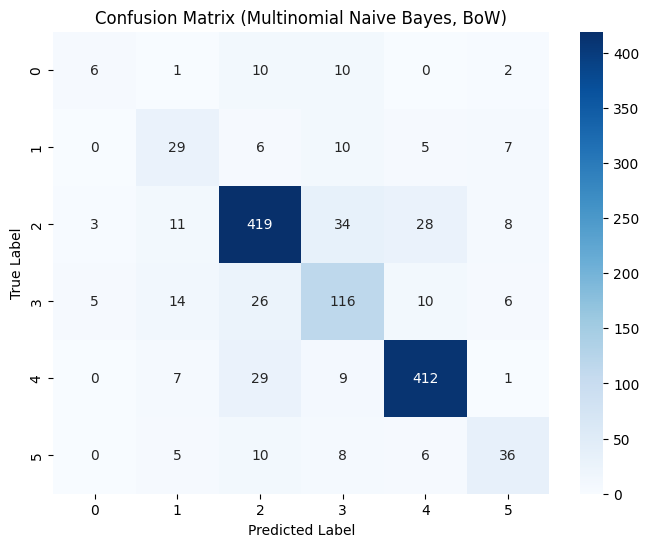

In [ ]:
from sklearn.calibration import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer  # Important to re-import
from sklearn.naive_bayes import MultinomialNB  # Important to re-import

# Re-initialize and train the model (to ensure use of correct one)
bow_vectorizer = CountVectorizer(max_features=5000)
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

best_alpha = 0.1
mnb_best = MultinomialNB(alpha=best_alpha)
mnb_best.fit(X_train_bow, y_train)
y_pred_best = mnb_best.predict(X_test_bow)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=mnb_best.classes_,
            yticklabels=mnb_best.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Multinomial Naive Bayes, BoW)')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

# Initialize the CountVectorizer (best feature extraction method)
bow_vectorizer = CountVectorizer(max_features=5000)
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# Initialize the Random Forest Classifier with adjusted class weights
rf_classifier_weighted = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight={0: 10, 1: 5, 2: 1, 3: 2, 4: 1, 5: 5}  # Adjusted weights
)

# Train the Random Forest Classifier
rf_classifier_weighted.fit(X_train_bow, y_train)

# Make predictions on the test set
y_pred_rf_weighted = rf_classifier_weighted.predict(X_test_bow)

# Evaluate the model
print("\n--- Random Forest (BoW, Weighted Classes) ---")
print(classification_report(y_test, y_pred_rf_weighted))


--- Random Forest (BoW, Weighted Classes) ---
              precision    recall  f1-score   support

           0       1.00      0.10      0.19        29
           1       0.70      0.12      0.21        57
           2       0.64      0.92      0.75       503
           3       0.83      0.41      0.55       177
           4       0.81      0.77      0.79       458
           5       0.87      0.40      0.55        65

    accuracy                           0.72      1289
   macro avg       0.81      0.45      0.51      1289
weighted avg       0.75      0.72      0.69      1289



In [171]:
import joblib

# Save the model
joblib.dump(mnb_best, 'bi95cz_tweet_classification_model.joblib')

# Save the vectorizer
joblib.dump(bow_vectorizer, 'bi95cz_tweet_classification_vectorizer.joblib')

['bi95cz_tweet_classification_vectorizer.joblib']